#Task 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score, roc_auc_score, precision_recall_curve, confusion_matrix
import seaborn as sns

In [ ]:
churn_df = pd.read_csv('/content/churn-bigml-20.csv')

In [ ]:
churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
churn_df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
# Converting 'Churn' to binary (1 for True, 0 for False)
churn_df['Churn'] = churn_df['Churn'].astype(int)

# Encoding categorical variables

# Binary encode 'International plan' and 'Voice mail plan' (Yes/No)
churn_df['International plan'] = churn_df['International plan'].map({'Yes': 1, 'No': 0})
churn_df['Voice mail plan'] = churn_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# One-hot encode 'State'
churn_df = pd.get_dummies(churn_df, columns=['State'], drop_first=True)

# Dropping 'Area code' as it may not be relevant in the prediction of churn
churn_df = churn_df.drop('Area code', axis=1)

In [ ]:
churn_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,False,False,False,False,False,False,False,False,False,False
1,65,0,0,0,129.1,137,21.95,228.5,83,19.42,...,False,False,False,False,False,False,False,False,False,False
2,161,0,0,0,332.9,67,56.59,317.8,97,27.01,...,False,False,False,False,False,False,False,False,False,False
3,111,0,0,0,110.4,103,18.77,137.3,102,11.67,...,False,False,False,False,False,False,False,False,False,False
4,49,0,0,0,119.3,117,20.28,215.1,109,18.28,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
churn_df['Churn'].value_counts()

,count
Churn,
0,572
1,95


In [ ]:
x = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
x = standardized_data
y = churn_df['Churn']
print(x)
print(y)

[[ 0.34712707 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [-0.92773053 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.42585272 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 ...
 [-1.05031299 -0.29380132 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]
 [ 1.37681974 -0.29380132 -0.6288064  ... -0.16172151  6.00462784
  -0.12949244]
 [ 1.98973205  3.40366063 -0.6288064  ... -0.16172151 -0.16653821
  -0.12949244]]
0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Name: Churn, Length: 667, dtype: int64


**Training and Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=7)
print(x.shape, x_train.shape, x_test.shape)

(667, 67) (533, 67) (134, 67)


In [ ]:
lr = LogisticRegression(class_weight= 'balanced')
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = lr.predict(x_test)

Accuracy: 0.7313
Precision: 0.2927
Recall: 0.6316
F1-Score: 0.4000
ROC-AUC: 0.7474
Precision-Recall AUC: 0.3336

Confusion Matrix:
[[86 29]
 [ 7 12]]


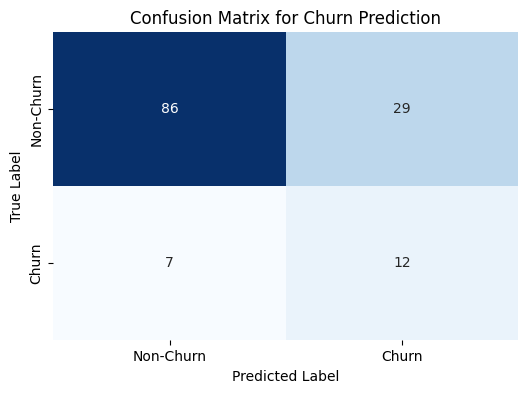

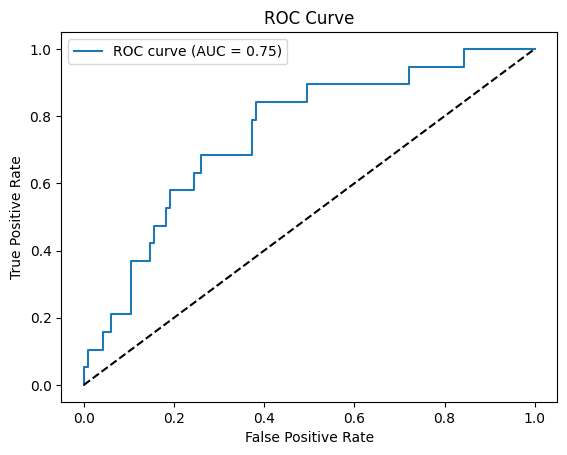

In [ ]:
# Assuming these imports are already in your code
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your existing code (for context)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Compute ROC curve and AUC
y_prob = lr.predict_proba(x_test)[:, 1]  # Probability of positive class (churn)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Calculate ROC-AUC
y_prob = lr.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Adding the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix with "Non-Churn" and "Churn" labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Churn', 'Churn'],
            yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix for Churn Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Your existing ROC curve plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

**Using Cross Validation**

In [ ]:
lr = LogisticRegression(class_weight= 'balanced')
cv_score = cross_val_score(lr, x, y, cv=45, scoring='accuracy')

# Define stratified k-fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform 5-fold cross-validation
cv_results = cross_validate(lr, x, y, cv=skf, scoring=scoring, return_train_score=True)

# Print the cross-validation results
print("Basic Logistic Regression (5-Fold Stratified Cross-Validation):")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")
print(f"F1-Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")
print(f"ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std() * 2:.4f})")

Basic Logistic Regression (5-Fold Stratified Cross-Validation):
Accuracy: 0.7482 (+/- 0.0892)
Precision: 0.2972 (+/- 0.1303)
Recall: 0.5368 (+/- 0.1811)
F1-Score: 0.3806 (+/- 0.1448)
ROC-AUC: 0.7057 (+/- 0.1591)


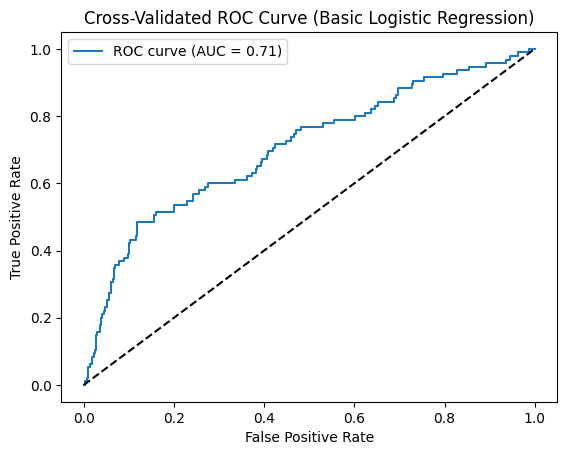

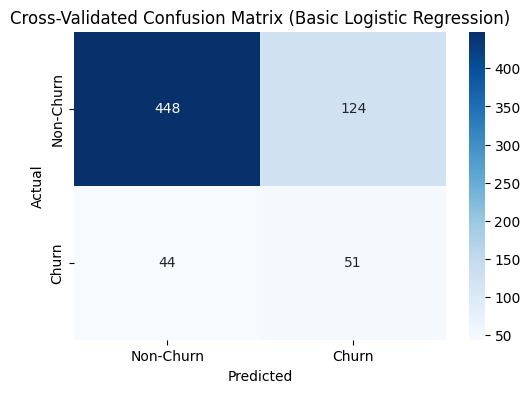

In [ ]:
# Get cross-validated predictions for ROC curve (predicted probabilities)
y_prob_cv = cross_val_predict(lr, x, y, cv=skf, method='predict_proba')[:, 1]

# Get cross-validated predictions for confusion matrix (predicted labels)
y_pred_cv = cross_val_predict(lr, x, y, cv=skf, method='predict')

# Plot ROC curve (cross-validated)
fpr, tpr, _ = roc_curve(y, y_prob_cv)
roc_auc = roc_auc_score(y, y_prob_cv)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve (Basic Logistic Regression)')
plt.legend(loc='best')
plt.show()

# Plot confusion matrix (cross-validated)
cm = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Cross-Validated Confusion Matrix (Basic Logistic Regression)')
plt.show()

#Task 2

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feature=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feature = n_feature
        self.root = None

    def fit(self, X, Y):
        self.n_feature = X.shape[1] if not self.n_feature else min(X.shape[1], self.n_feature)
        self.root = self.grow_tree(X, Y)

    def grow_tree(self, X, Y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(Y))

        # Stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self.most_common_label(Y)
            return Node(value=leaf_value)

        feat_indexes = np.random.choice(n_features, self.n_feature, replace=False)

        # Find the best split
        best_feature, best_threshold = self.best_split(X, Y, feat_indexes)

        # If no valid split is found, return a leaf node
        if best_feature is None or best_threshold is None:
            leaf_value = self.most_common_label(Y)
            return Node(value=leaf_value)

        # Create child nodes
        left_idxs, right_idxs = self.split(X[:, best_feature], best_threshold)
        left = self.grow_tree(X[left_idxs, :], Y[left_idxs], depth + 1)
        right = self.grow_tree(X[right_idxs, :], Y[right_idxs], depth + 1)
        return Node(best_feature, best_threshold, left, right)

    def best_split(self, X, Y, feature_indexes):
        best_gain = -1
        split_index, split_threshold = None, None

        for feat_index in feature_indexes:
            X_column = X[:, feat_index]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self.information_gain(Y, X_column, thr)
                if gain > best_gain:
                    best_gain = gain
                    split_index = feat_index
                    split_threshold = thr

        # Return the best split (or None if no gain > -1)
        return split_index, split_threshold

    def information_gain(self, Y, X_column, threshold):
        parent_entropy = self.entropy(Y)
        left_idxs, right_idxs = self.split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(Y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self.entropy(Y[left_idxs]), self.entropy(Y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        info_gain = parent_entropy - child_entropy
        return info_gain

    def split(self, X_column, splitting_threshold):
        left_idxs = np.argwhere(X_column <= splitting_threshold).flatten()
        right_idxs = np.argwhere(X_column > splitting_threshold).flatten()
        return left_idxs, right_idxs

    def entropy(self, Y):
        cnt_of_each_element = np.bincount(Y)
        prob = cnt_of_each_element / len(Y)
        entropy = -np.sum([pi * np.log(pi) for pi in prob if pi > 0])
        return entropy

    def most_common_label(self, Y):
        cnt = Counter(Y)
        if not cnt:  # Handle empty Y
            return 0  # Default to 0 (Non-Churn) or choose another default
        value = cnt.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

In [ ]:
iris_df = pd.read_csv('/content/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
X = iris_df.drop(columns=['species']).values
Y = iris_df['species'].values

Data Standardization

In [ ]:
# Encode labels
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
x = standardized_data
y = Y_encoded

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 7, stratify= y)
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (120, 4) (30, 4)


In [ ]:
# Initialize and fit your decision tree
model = DecisionTree()
model.fit(x_train, y_train)

# Predict on test data
test_predictions = model.predict(x_test)

print(test_predictions)

[2 0 0 1 2 1 2 0 2 2 1 0 0 1 1 1 0 0 1 1 2 0 1 0 2 2 1 1 0 2]


0 -> iris setosa

1 -> iris versicolor

2 -> iris virginica

In [ ]:
def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_test)

acc = accuracy(y_test, test_predictions)
print(acc)

0.9666666666666667


#Task 3

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
class K_Means:
  def __init__(self, n_clusters = 2, max_iterations = 100):
    self.n_clusters = n_clusters
    self.max_iterations = max_iterations
    self.centroids = None

  def fit_predict(self, X):
    rand_idx = random.sample(range(0, X.shape[0]), self.n_clusters)
    self.centroids = X[rand_idx]

    for i in range(self.max_iterations):
      # Assign Clusters
      cluster_group = self.assign_clusters(X)  # will return a value like [0,1,0,1,1]

      # Move Centroids
      old_centroids = self.centroids
      self.centroids = self.move_centroids(X, cluster_group)

      # Check completion
      if (old_centroids == self.centroids).all(  ):
        break
    return cluster_group

  def assign_clusters(self, X):
    cluster_group = []
    distances = []

    for row in X:
      for centroid in self.centroids:
        distance = np.sqrt(np.dot(row - centroid, row - centroid))
        distances.append(distance)
      cluster_group.append(np.argmin(distances))
      distances = []
    return np.array(cluster_group)

  def move_centroids(self, X, cluster_group):
    new_centroids = []
    cluster_type = np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(X[cluster_group == type].mean(axis = 0))

    return np.array(new_centroids)


In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Data Standardization

In [ ]:
ss = StandardScaler()
df[['Age Standardized']] = ss.fit_transform(df[['Age']])
df[['Annual Income Standardized']] = ss.fit_transform(df[['Annual Income (k$)']])
df[['Spending Score (1-100) Standardized']] = ss.fit_transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Standardized,Annual Income Standardized,Spending Score (1-100) Standardized
0,1,1,19,15,39,-1.424569,-1.738999,-0.434801
1,2,1,21,15,81,-1.281035,-1.738999,1.195704
2,3,0,20,16,6,-1.352802,-1.700830,-1.715913
3,4,0,23,16,77,-1.137502,-1.700830,1.040418
4,5,0,31,17,40,-0.563369,-1.662660,-0.395980


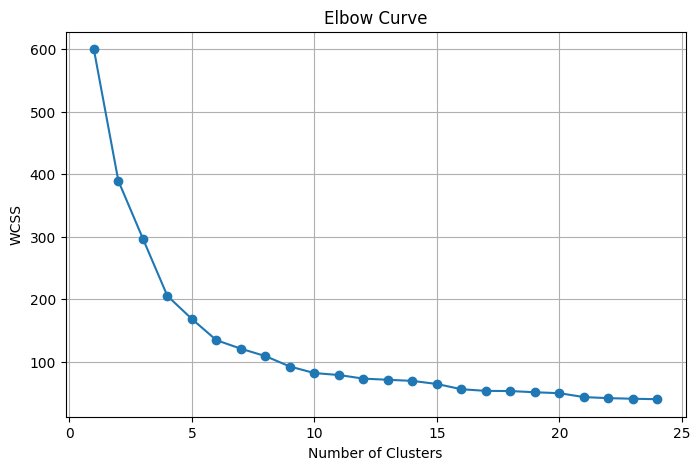

In [ ]:
df_clean = df[['Age Standardized', 'Annual Income Standardized', 'Spending Score (1-100) Standardized']]
scaler = StandardScaler()
X = scaler.fit_transform(df_clean)

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=6)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 25), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

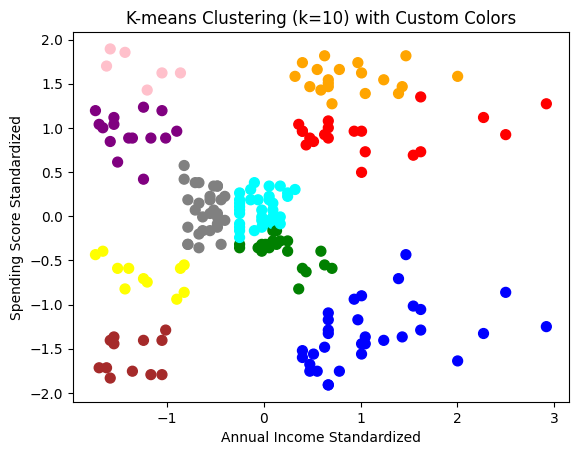

In [ ]:
# According to the elbow curve k = 10 seems like a good value of clusters so we'll go ahead with that

X = df[['Annual Income Standardized', 'Spending Score (1-100) Standardized']].values
kmeans = K_Means(n_clusters=10, max_iterations=1000)
df['Clusters'] = kmeans.fit_predict(X)

# Define custom colors for each cluster
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
plt.scatter(df['Annual Income Standardized'], df['Spending Score (1-100) Standardized'], c=df['Clusters'].apply(lambda x: colors[x % len(colors)]), s=50)
plt.xlabel('Annual Income Standardized')
plt.ylabel('Spending Score Standardized')
plt.title('K-means Clustering (k=10) with Custom Colors')
plt.show()